# imports

In [23]:
from module import *

# system init

In [24]:
spring_system = SpringSystem(set_seed=0)

In [25]:
su = SurrogateCreator(set_seed=0)

Generating data: 100%|██████████| 100000/100000 [03:17<00:00, 505.31it/s]


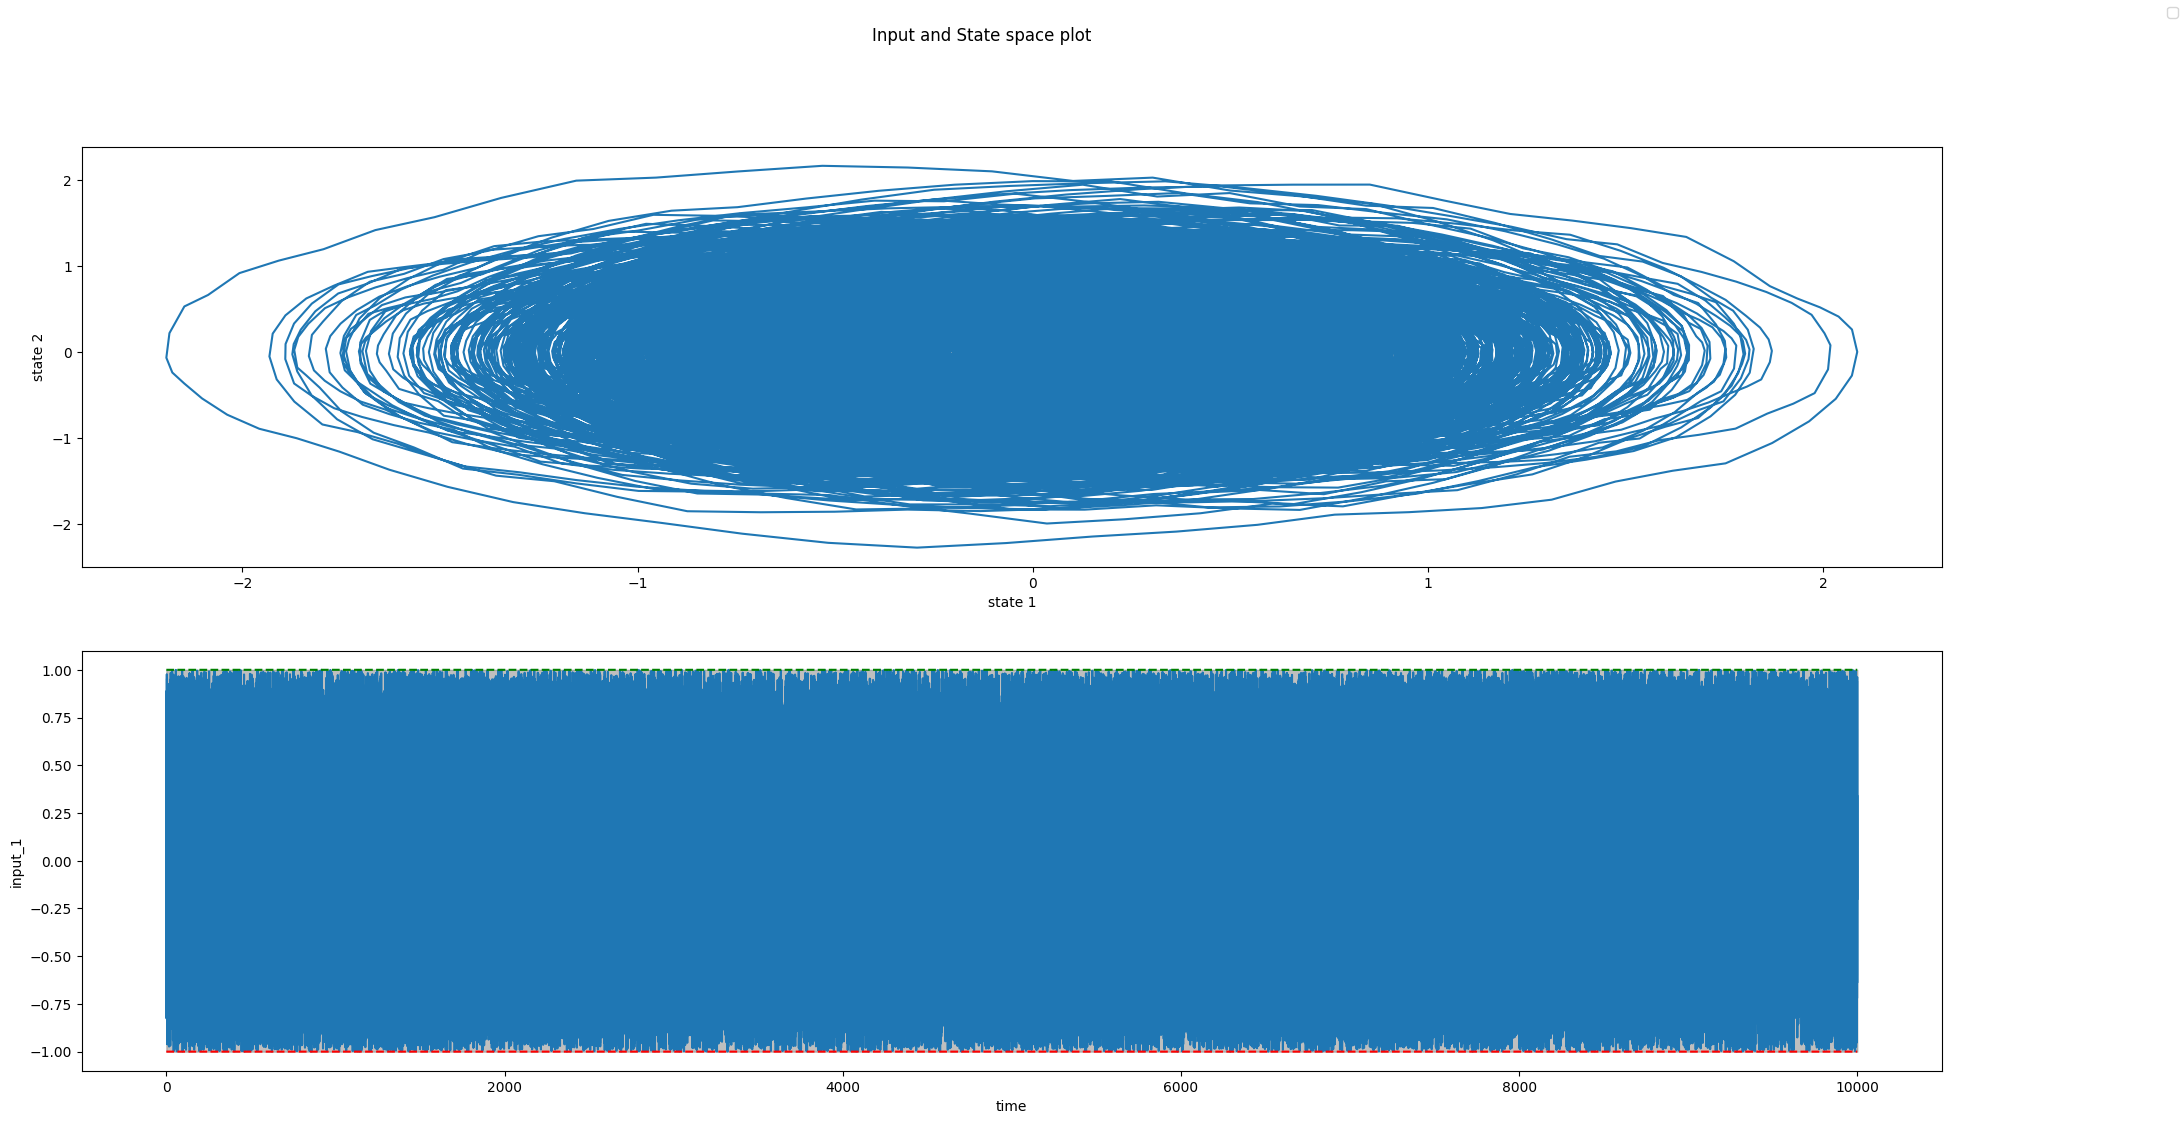

In [26]:
su.random_input_sampler(system = spring_system, n_samples=100000)
su.data_splitter(order=3, cqr_calibration=0.001, test=0.001, narx_train=0.998, cqr_train=0.998)
#su.data_splitter(order=3)
su.visualize2d_data()

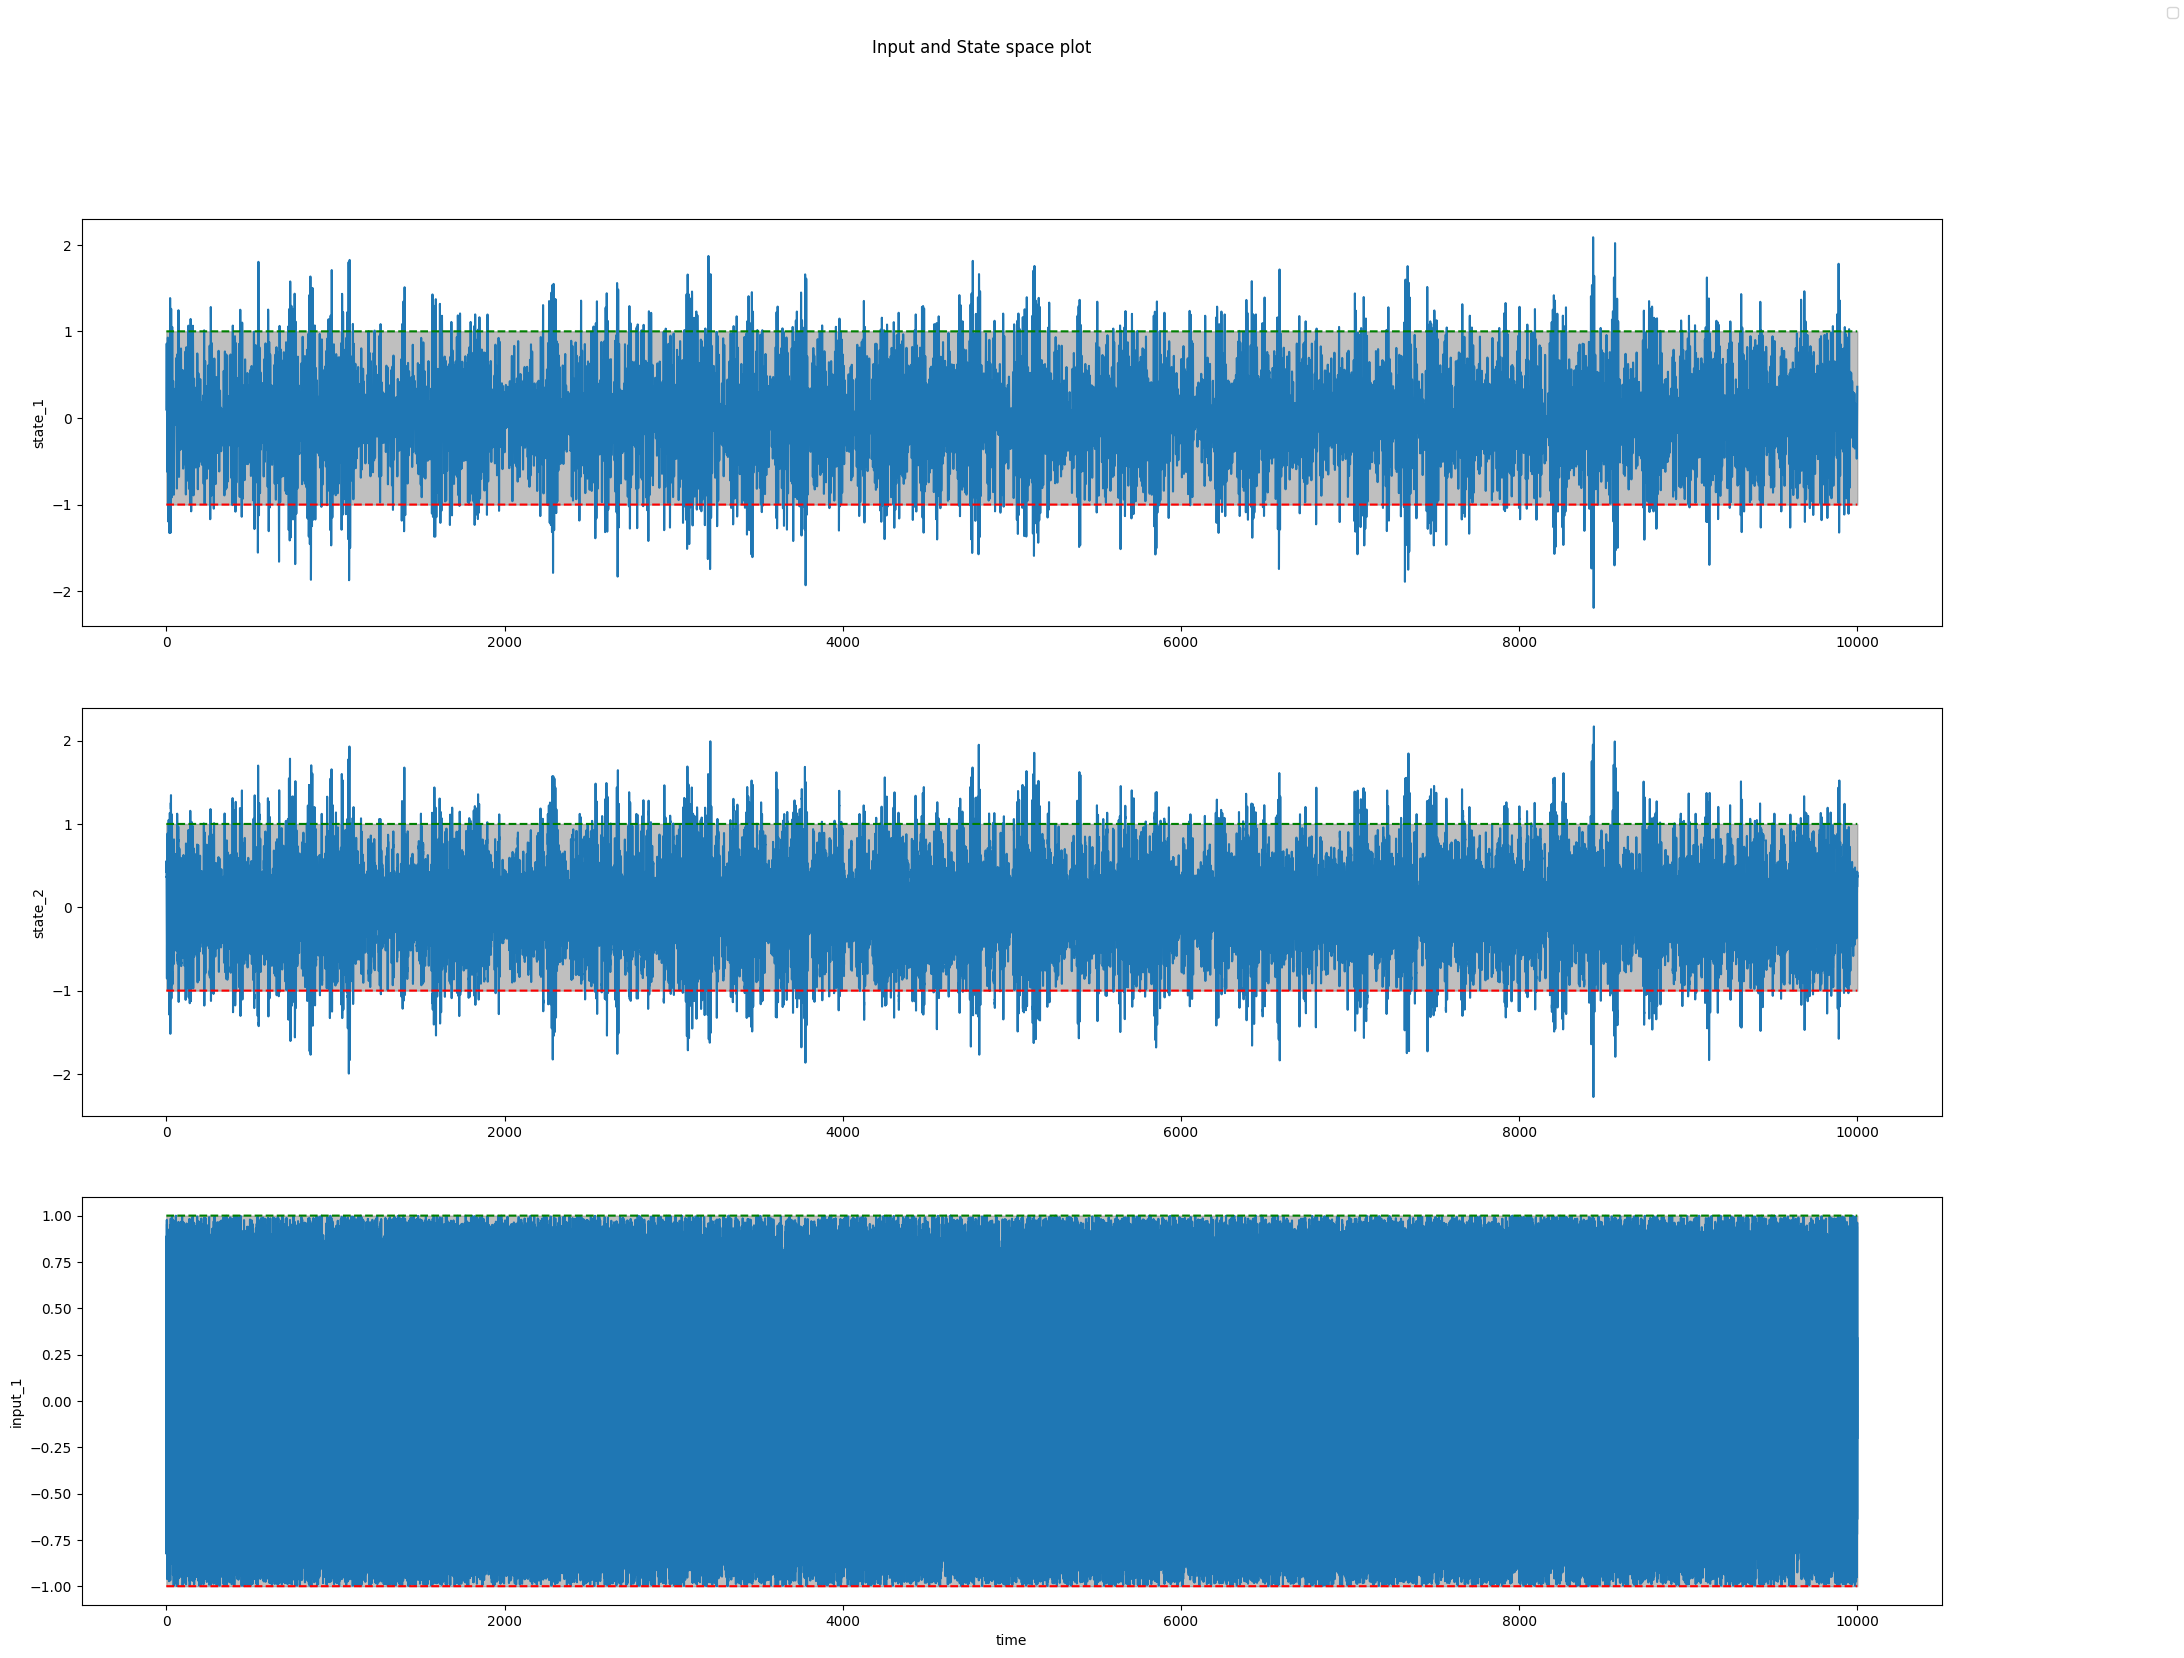

In [27]:
su.visualize_data()

Training NARX: 100%|██████████| 1000/1000 [19:55<00:00,  1.20s/it]


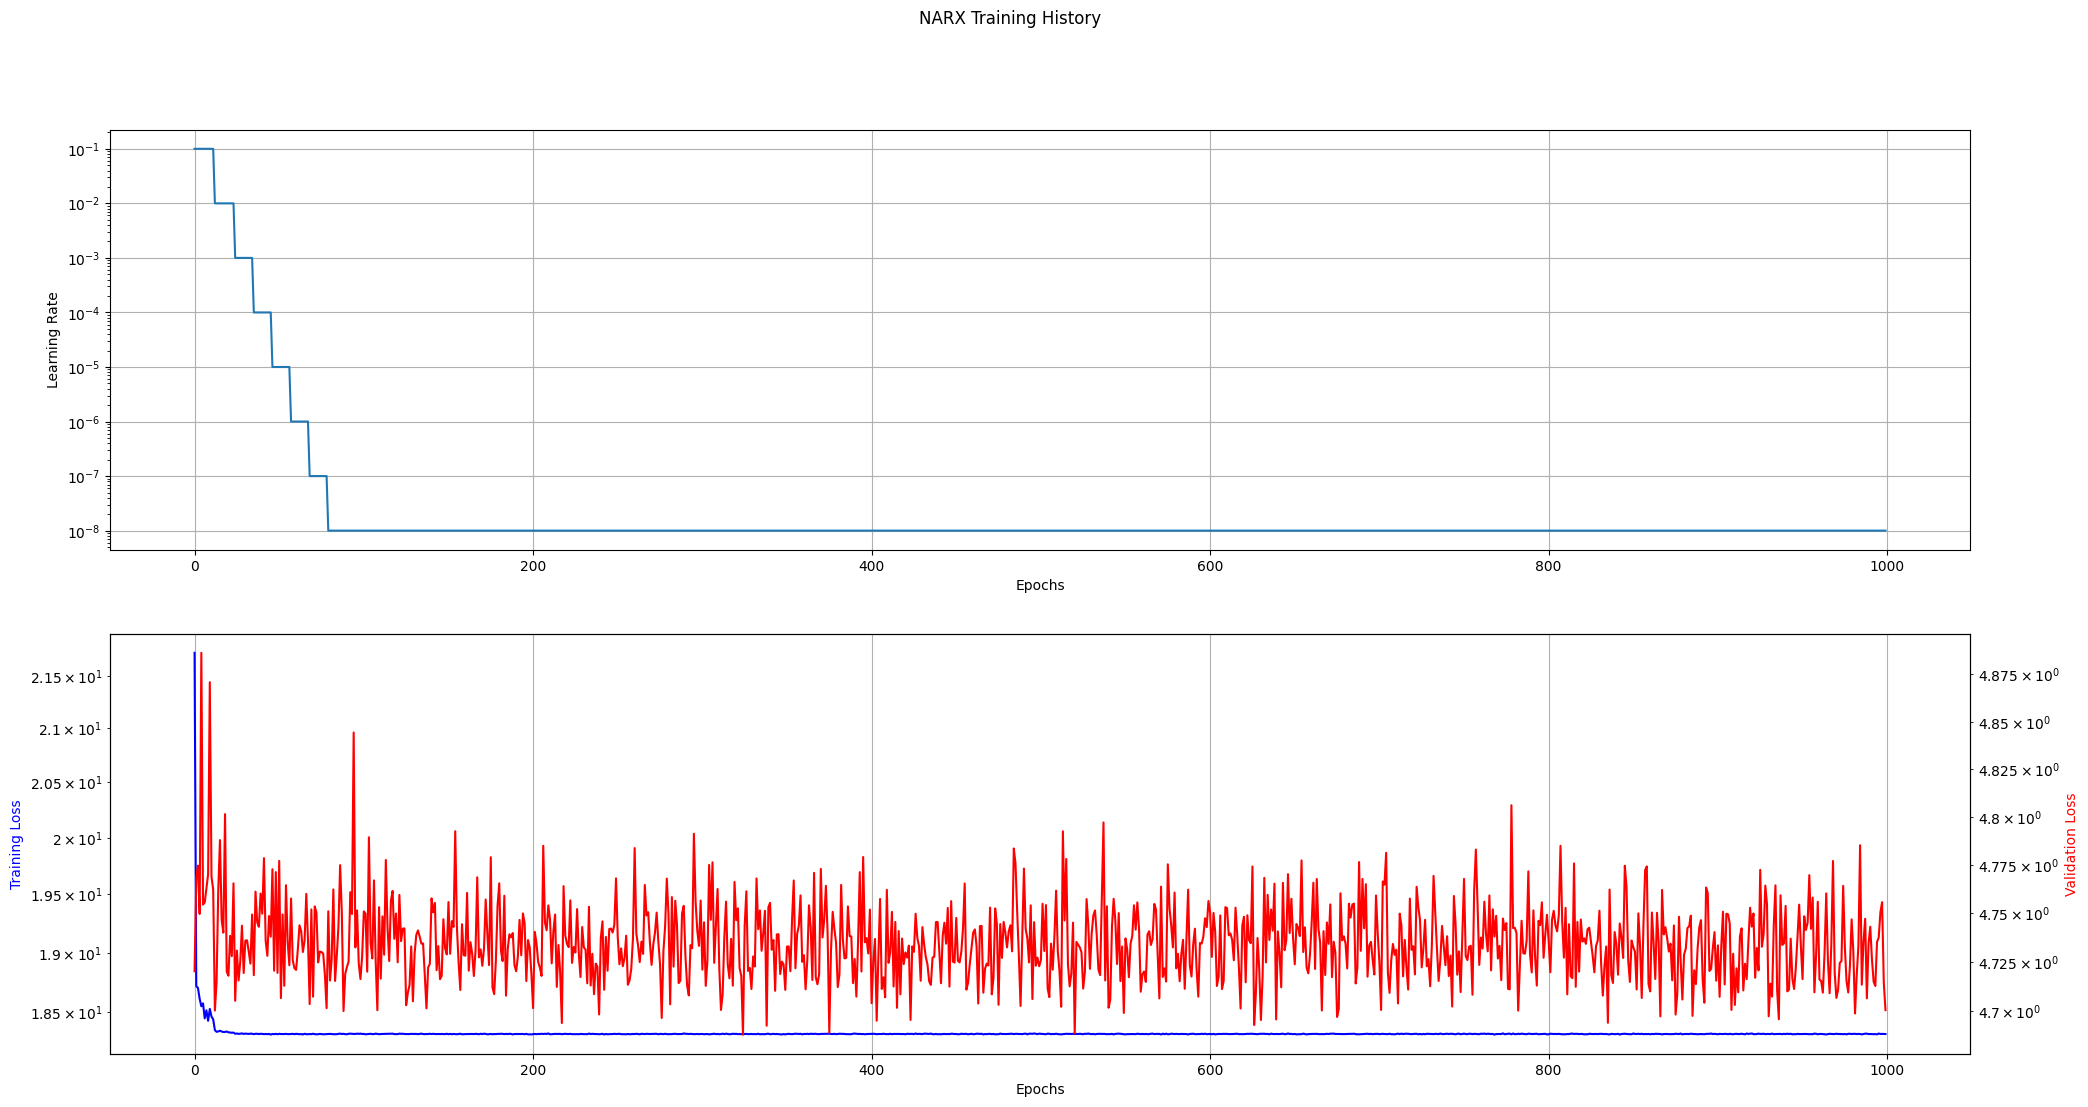

In [29]:
su.narx_trainer(hidden_layers=[1], batch_size=320,
          learning_rate=0.1, epochs= 1000, scheduler_flag=True)
su.plot_narx_training_history()

Training Cqr q= 0.1: 100%|██████████| 1000/1000 [18:04<00:00,  1.08s/it]


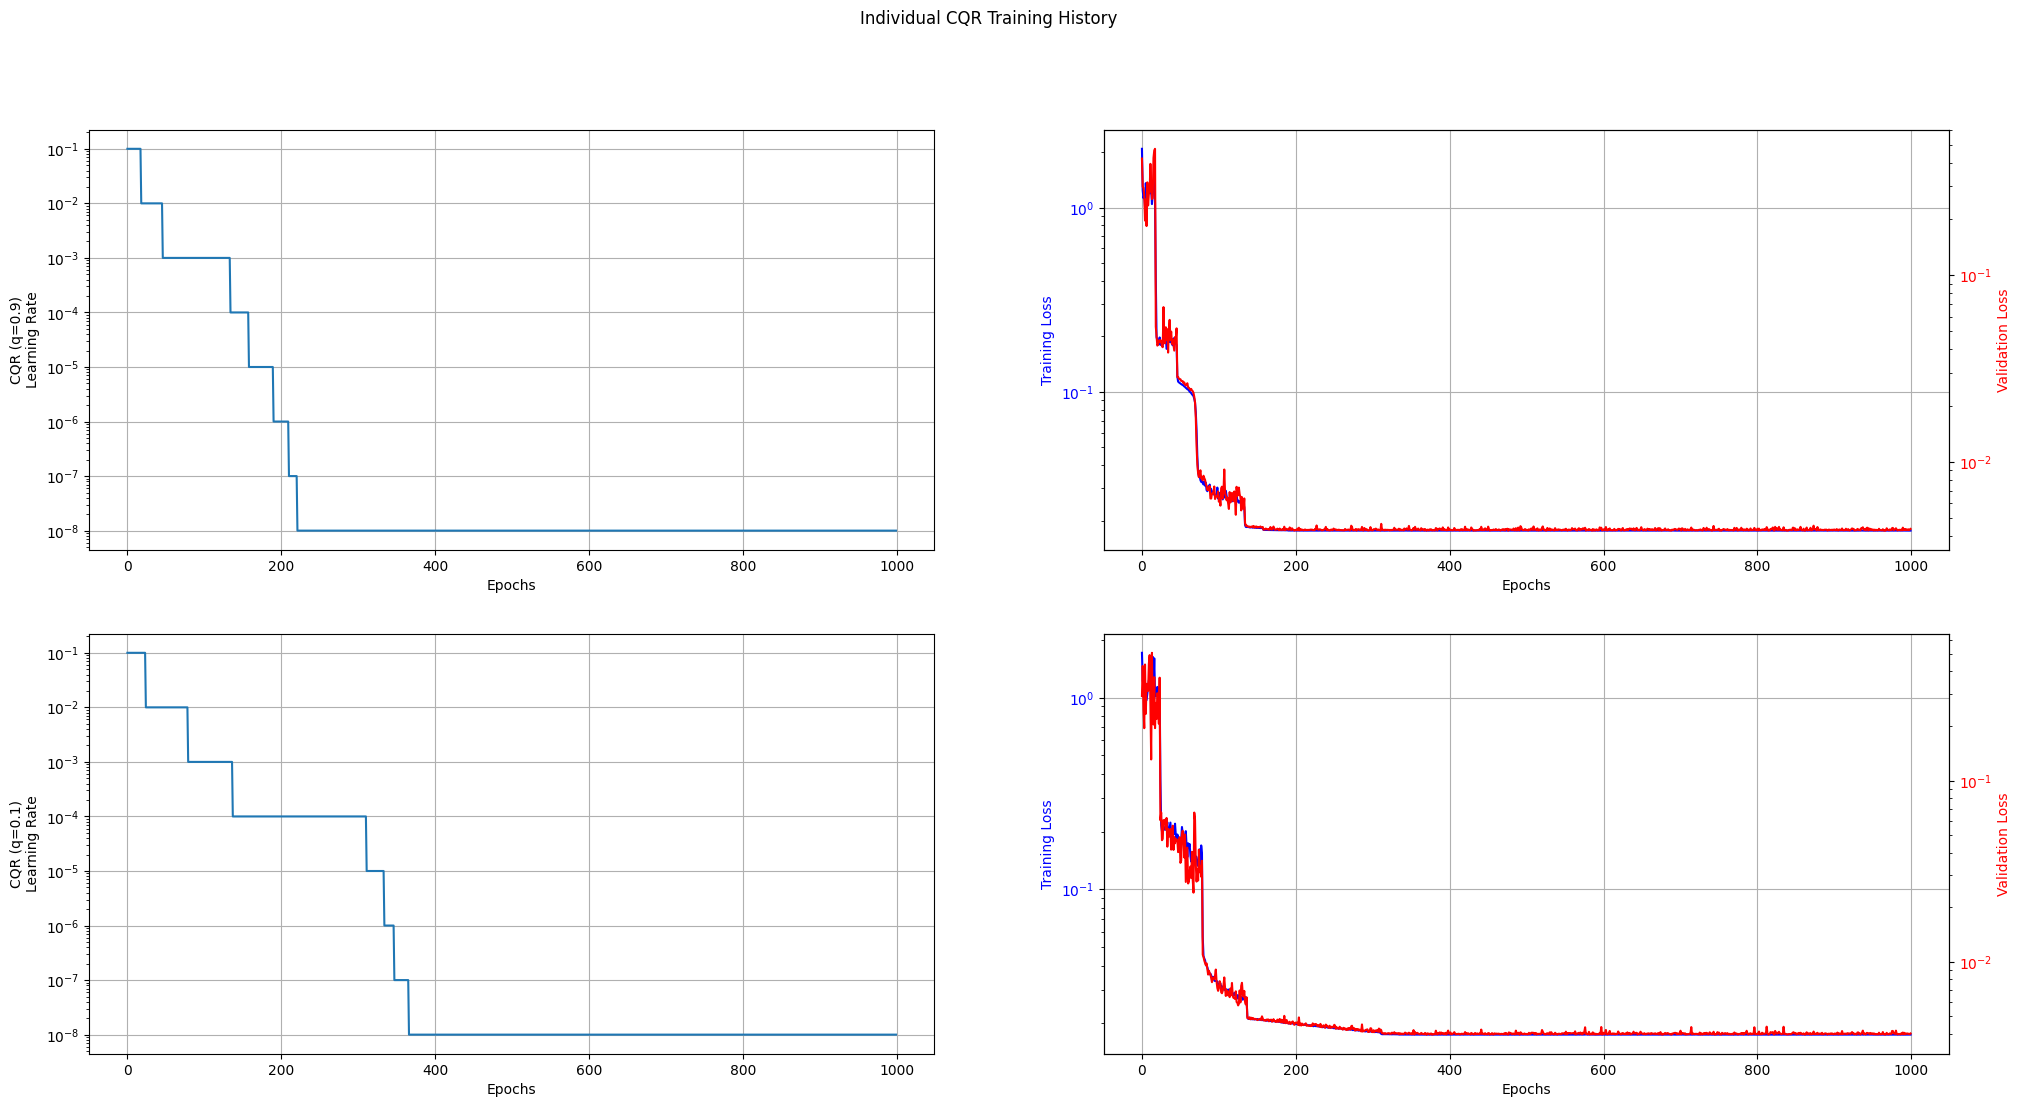

In [30]:
su.train_individual_qr(alpha=0.2, hidden_layers=[10], batch_size=320)
su.plot_qr_training_history()

Calculating surrogate model error: 100%|██████████| 50/50 [00:00<00:00, 70.92it/s]


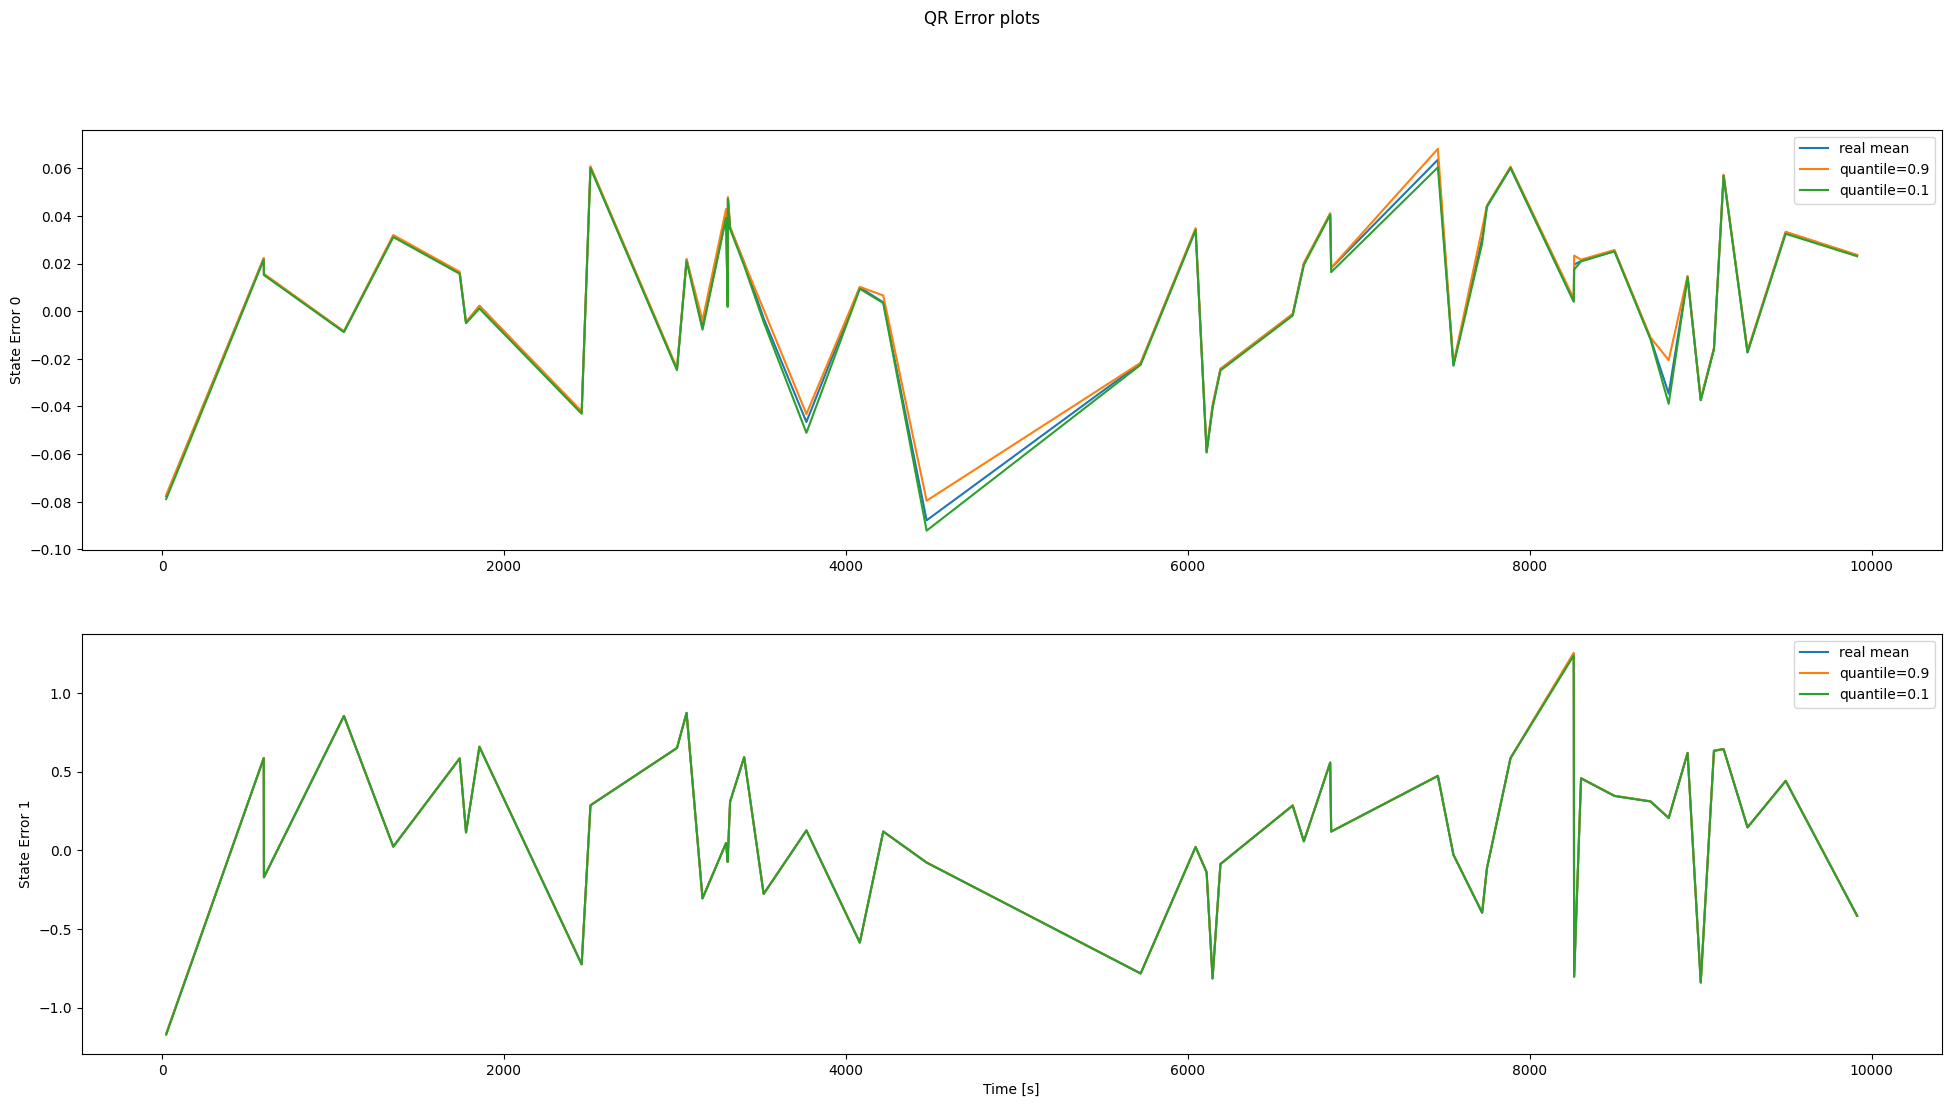

In [31]:
su.plot_qr_error()

Calculating surrogate model state intervals: 100%|██████████| 50/50 [00:00<00:00, 908.48it/s]


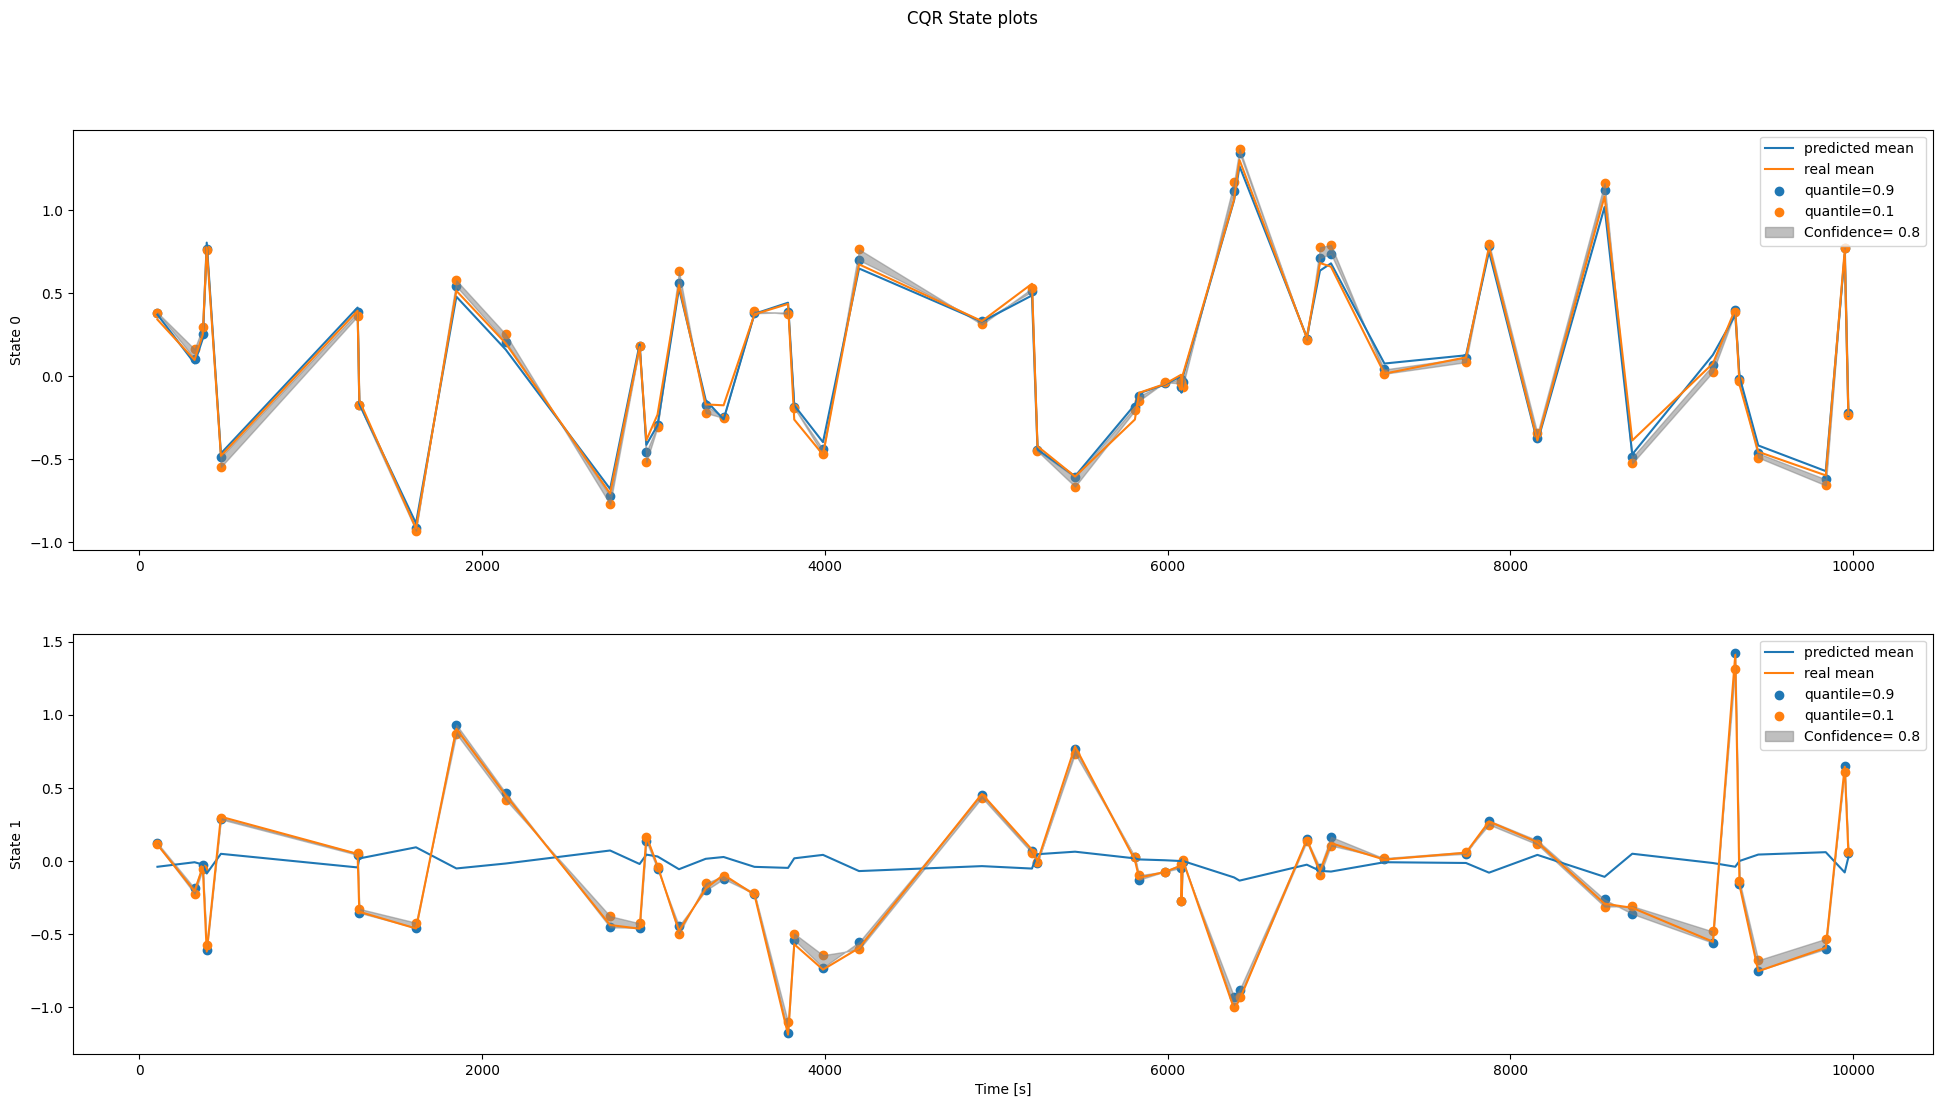

In [32]:
su.conform_qr()
su.plot_cqr_error()